# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | inuvik
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | saint-michel-des-saints
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | goderich
Processing Record 12 of Set 1 | kroya
Processing Record 13 of Set 1 | tacarigua
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | lima
Processing Record 17 of Set 1 | tharad
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | akyab
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of Set 1 | kirkenes
Processing Re

Processing Record 33 of Set 4 | zhezkazgan
Processing Record 34 of Set 4 | constitucion
Processing Record 35 of Set 4 | tevaitoa
Processing Record 36 of Set 4 | filingue
Processing Record 37 of Set 4 | nexo
Processing Record 38 of Set 4 | beloha
Processing Record 39 of Set 4 | longhua
Processing Record 40 of Set 4 | tazmalt
Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 4 | ahipara
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | baoding
Processing Record 45 of Set 4 | cortez
Processing Record 46 of Set 4 | dunedin
Processing Record 47 of Set 4 | mayskiy
Processing Record 48 of Set 4 | dunmore town
Processing Record 49 of Set 4 | rio pomba
Processing Record 0 of Set 5 | bubaque
Processing Record 1 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 5 | nago
Processing Record 3 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 4 of Set 5 | aksu
Processing Record 5 of Set 5 

Processing Record 25 of Set 8 | half moon bay
Processing Record 26 of Set 8 | mithi
Processing Record 27 of Set 8 | bathsheba
Processing Record 28 of Set 8 | leshukonskoye
Processing Record 29 of Set 8 | kidodi
Processing Record 30 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 31 of Set 8 | inongo
Processing Record 32 of Set 8 | neuquen
Processing Record 33 of Set 8 | avera
Processing Record 34 of Set 8 | pochutla
Processing Record 35 of Set 8 | usinsk
Processing Record 36 of Set 8 | matay
Processing Record 37 of Set 8 | itupiranga
Processing Record 38 of Set 8 | markova
Processing Record 39 of Set 8 | indiana
Processing Record 40 of Set 8 | linxia
Processing Record 41 of Set 8 | kollo
Processing Record 42 of Set 8 | puerto de la cruz
Processing Record 43 of Set 8 | lolua
City not found. Skipping...
Processing Record 44 of Set 8 | salvador
Processing Record 45 of Set 8 | bambous virieux
Processing Record 46 of Set 8 | kousseri
Processing Record 47 of Set 8 | hofn


Processing Record 17 of Set 12 | chapada dos guimaraes
Processing Record 18 of Set 12 | bondo
Processing Record 19 of Set 12 | indramayu
Processing Record 20 of Set 12 | rundu
Processing Record 21 of Set 12 | ziri
Processing Record 22 of Set 12 | ijaki
City not found. Skipping...
Processing Record 23 of Set 12 | lazaro cardenas
Processing Record 24 of Set 12 | morros
Processing Record 25 of Set 12 | matara
Processing Record 26 of Set 12 | saint-malo
Processing Record 27 of Set 12 | hay river
Processing Record 28 of Set 12 | mengcheng
Processing Record 29 of Set 12 | maceio
Processing Record 30 of Set 12 | semey
Processing Record 31 of Set 12 | montecristi
Processing Record 32 of Set 12 | marzuq
Processing Record 33 of Set 12 | mount pleasant
Processing Record 34 of Set 12 | barguzin
Processing Record 35 of Set 12 | najran
Processing Record 36 of Set 12 | witu
Processing Record 37 of Set 12 | puerto madero
Processing Record 38 of Set 12 | huinan
Processing Record 39 of Set 12 | freeport

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,59.32,80,99,24.25,NZ,1675645011
1,inuvik,68.3499,-133.7218,-31.94,68,20,2.30,CA,1675645011
2,rikitea,-23.1203,-134.9692,79.14,75,3,14.03,PF,1675644812
3,hilo,19.7297,-155.0900,77.29,85,75,5.99,US,1675644988
4,punta arenas,-53.1500,-70.9167,50.11,71,75,18.41,CL,1675645012


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
# city_data_df['Date'] = city_data_df['Date'].astype(float)
# city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit="s")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,59.32,80,99,24.25,NZ,1675645011
1,inuvik,68.3499,-133.7218,-31.94,68,20,2.30,CA,1675645011
2,rikitea,-23.1203,-134.9692,79.14,75,3,14.03,PF,1675644812
3,hilo,19.7297,-155.0900,77.29,85,75,5.99,US,1675644988
4,punta arenas,-53.1500,-70.9167,50.11,71,75,18.41,CL,1675645012


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

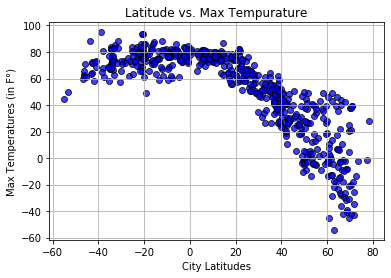

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Tempurature")
plt.xlabel("City Latitudes")
plt.ylabel("Max Temperatures (in F°)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

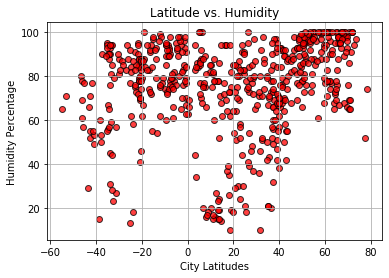

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="red", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("City Latitudes")
plt.ylabel("Humidity Percentage")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Hmdty.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

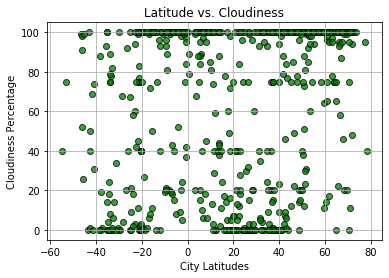

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="green", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("City Latitudes")
plt.ylabel("Cloudiness Percentage")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

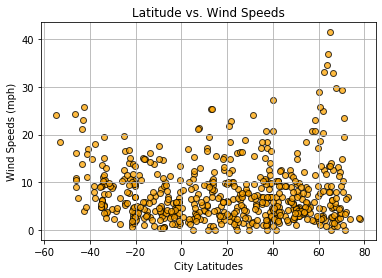

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="orange", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speeds")
plt.xlabel("City Latitudes")
plt.ylabel("Wind Speeds (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,inuvik,68.3499,-133.7218,-31.94,68,20,2.30,CA,1675645011
3,hilo,19.7297,-155.0900,77.29,85,75,5.99,US,1675644988
5,saint-michel-des-saints,46.6834,-73.9159,24.94,98,100,1.68,CA,1675645013
9,goderich,43.7501,-81.7165,35.92,80,100,6.91,CA,1675645015
11,tacarigua,10.0862,-67.9198,72.64,85,81,3.98,VE,1675645016


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,59.32,80,99,24.25,NZ,1675645011
2,rikitea,-23.1203,-134.9692,79.14,75,3,14.03,PF,1675644812
4,punta arenas,-53.1500,-70.9167,50.11,71,75,18.41,CL,1675645012
6,hithadhoo,-0.6000,73.0833,80.92,70,97,10.47,MV,1675645013
7,hermanus,-34.4187,19.2345,70.81,88,18,11.18,ZA,1675645014


###  Temperature vs. Latitude Linear Regression Plot

The line regression for the Northern Hemisphere is y =-1.4x +92.69
The r-value is: -0.8647812533072057
The r-squared value is: 0.7478466160715814
The correlation between latitude and the maximum temperature is strongly negative for the Northern Hemisphere.
The further you go from the equator, the maximum temperature decreases.


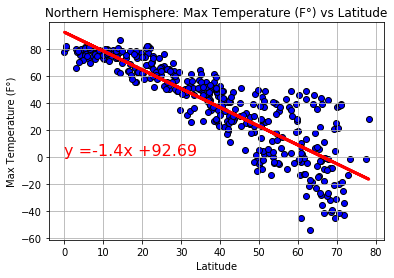

In [14]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq1 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Northern Hemisphere: Max Temperature (F°) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")
plt.annotate(line_eq1, (0,1), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Northern Temp vs Lat")

print(f"The line regression for the Northern Hemisphere is {line_eq1}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the maximum temperature is strongly negative for the Northern Hemisphere.")
print("The further you go from the equator, the maximum temperature decreases.")

The line regression for the southern Hemisphere is y =0.21x +78.85
The r-value is: 0.33482311034235346
The r-squared value is: 0.1121065152193278
The correlation between latitude and maximum temperature is moderately positive for the Southern Hemisphere.
The closer a city is to the equator results in a higher maximum temperature.


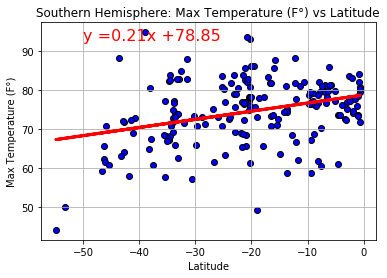

In [15]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq2 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Southern Hemisphere: Max Temperature (F°) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")
plt.annotate(line_eq2, (-50,93), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Southern Temp vs Lat")

print(f"The line regression for the southern Hemisphere is {line_eq2}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and maximum temperature is moderately positive for the Southern Hemisphere.")
print("The closer a city is to the equator results in a higher maximum temperature.")

### Humidity vs. Latitude Linear Regression Plot

The line regression for the Northern Hemisphere is y =0.5x +55.69
The r-value is: 0.4451916462104898
The r-squared value is: 0.19819560185560592
The correlation between latitude and the humidity is positive for the Northern Hemisphere.
The regression line does not show much correlation of the data.


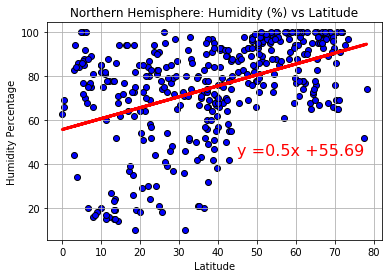

In [16]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq3 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Northern Hemisphere: Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.annotate(line_eq3, (45,44), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Northern Humidity vs Lat")

print(f"The line regression for the Northern Hemisphere is {line_eq3}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the humidity is positive for the Northern Hemisphere.")
print("The regression line does not show much correlation of the data.")

The line regression for the Southern Hemisphere is y =0.48x +86.97
The r-value is: 0.36427143821530084
The r-squared value is: 0.13269368069944373
The correlation between latitude and the humidity is very weakly positive for the southern Hemisphere.
The regression line does not show much correlation of the data.


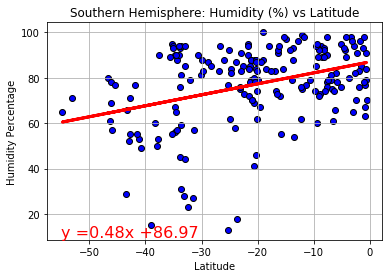

In [17]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq4 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Southern Hemisphere: Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.annotate(line_eq4, (-55,10), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Southern Humidity vs Lat")

print(f"The line regression for the Southern Hemisphere is {line_eq4}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the humidity is very weakly positive for the southern Hemisphere.")
print("The regression line does not show much correlation of the data.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The line regression for the Northern Hemisphere is y =0.62x +37.93
The r-value is: 0.29961389833474744
The r-squared value is: 0.08976848807534438
The correlation between latitude and the cloudiness is positive for the Northern Hemisphere.
The regression line does not show much correlation, cloudiness percentage ranges 0-100% all over the hemisphere.


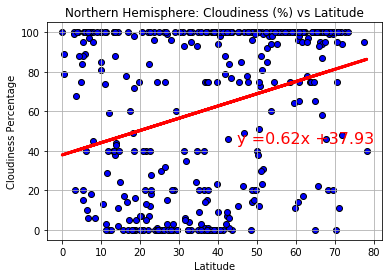

In [18]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq5 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Northern Hemisphere: Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Percentage")
plt.annotate(line_eq5, (45,44), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Northern Cloudiness vs Lat")

print(f"The line regression for the Northern Hemisphere is {line_eq5}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the cloudiness is positive for the Northern Hemisphere.")
print("The regression line does not show much correlation, cloudiness percentage ranges 0-100% all over the hemisphere.")

The line regression for the Southern Hemisphere is y =1.05x +78.52
The r-value is: 0.33462068780511806
The r-squared value is: 0.11197100470717028
The correlation between latitude and the cloudiness is positive for the southern Hemisphere.
The regression line does not show much correlation, cloudiness percentage ranges 0-100% all over the hemisphere.


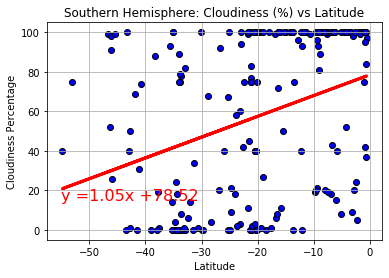

In [19]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq6 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Southern Hemisphere: Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Percentage")
plt.annotate(line_eq6, (-55,15), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Southern Cloudiness vs Lat")

print(f"The line regression for the Southern Hemisphere is {line_eq6}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the cloudiness is positive for the southern Hemisphere.")
print("The regression line does not show much correlation, cloudiness percentage ranges 0-100% all over the hemisphere.")

### Wind Speed vs. Latitude Linear Regression Plot

The line regression for the Northern Hemisphere is y =0.02x +6.88
The r-value is: 0.06977572890702749
The r-squared value is: 0.004868652344506992
The correlation between latitude and the wind speeds is about non-existent for the Northern Hemisphere.
The regression line does not show much correlation, wind speed is mainly prevalant between 0-10 mph all over the hemisphere.


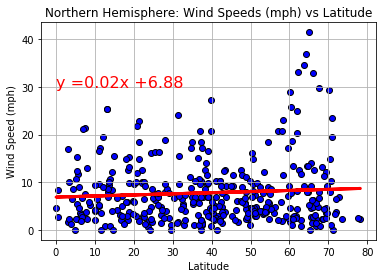

In [20]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq7 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Northern Hemisphere: Wind Speeds (mph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq7, (0,30), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Northern Wind Speed vs Lat")

print(f"The line regression for the Northern Hemisphere is {line_eq7}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the wind speeds is about non-existent for the Northern Hemisphere.")
print("The regression line does not show much correlation, wind speed is mainly prevalant between 0-10 mph all over the hemisphere.")

The line regression for the Southern Hemisphere is y =-0.18x +3.99
The r-value is: -0.4496987249290443
The r-squared value is: 0.20222894320280824
The correlation between latitude and the wind speeds shows a very weak negative for the Southern Hemisphere.
The regression line does not show much correlation, wind speed is all over the hemisphere.


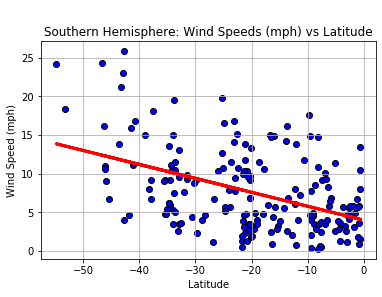

In [21]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq8 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Southern Hemisphere: Wind Speeds (mph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq8, (-30,30), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Southern Wind Speed vs Lat")

print(f"The line regression for the Southern Hemisphere is {line_eq8}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the wind speeds shows a very weak negative for the Southern Hemisphere.")
print("The regression line does not show much correlation, wind speed is all over the hemisphere.")